In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
df=pd.read_csv("/content/wine.csv")
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [20]:
df.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


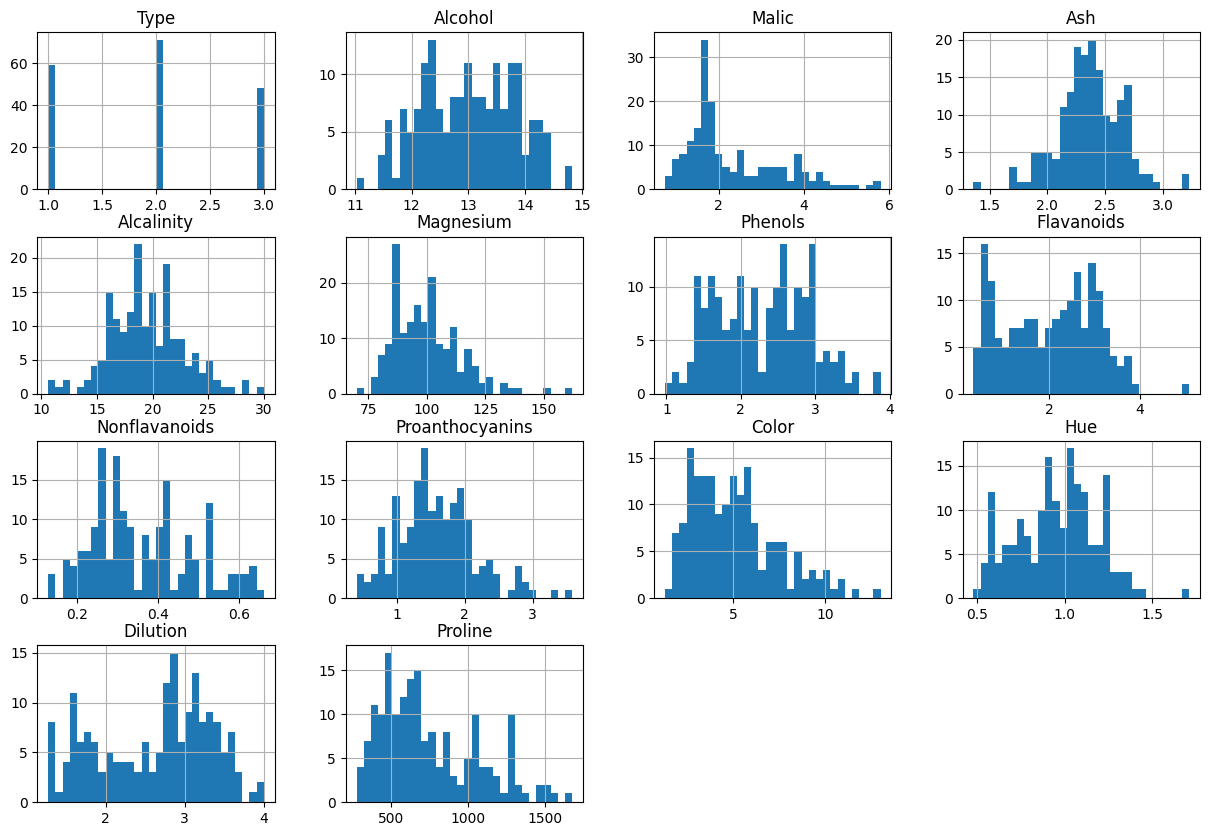

In [21]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

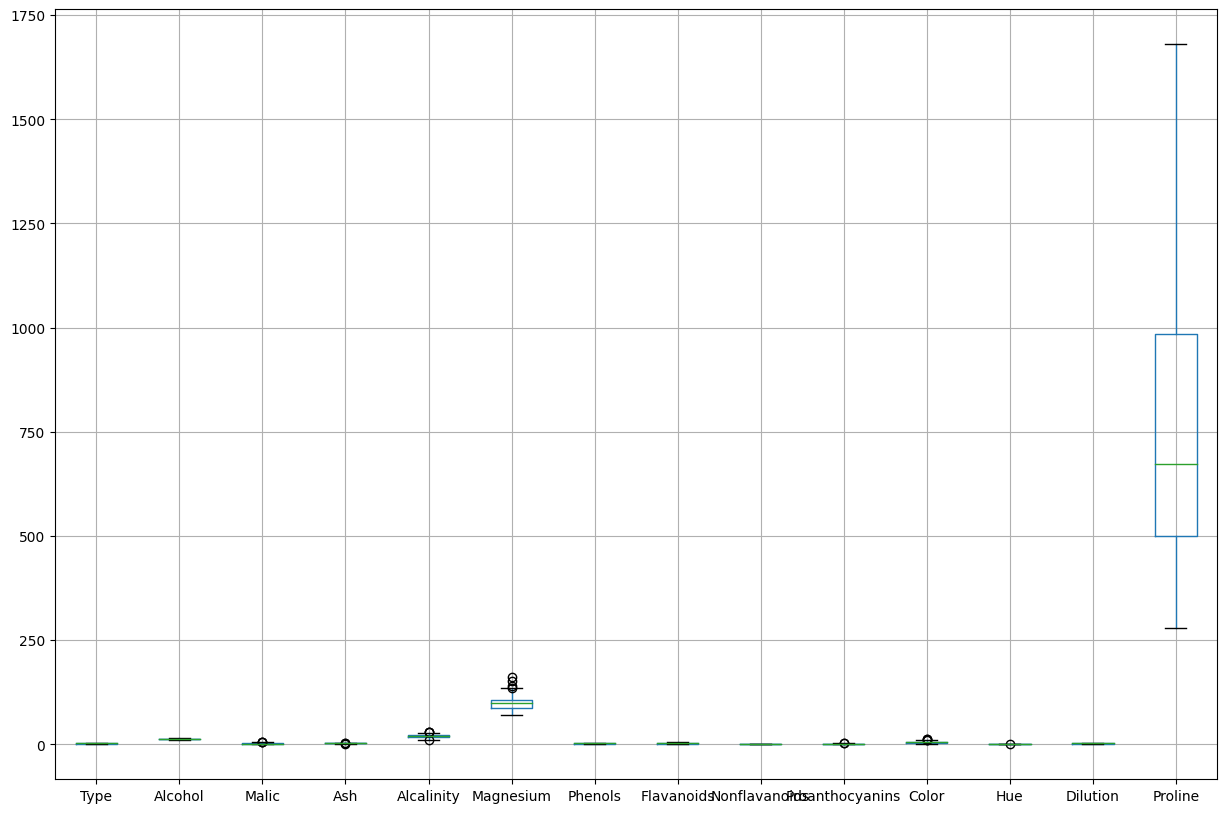

In [22]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

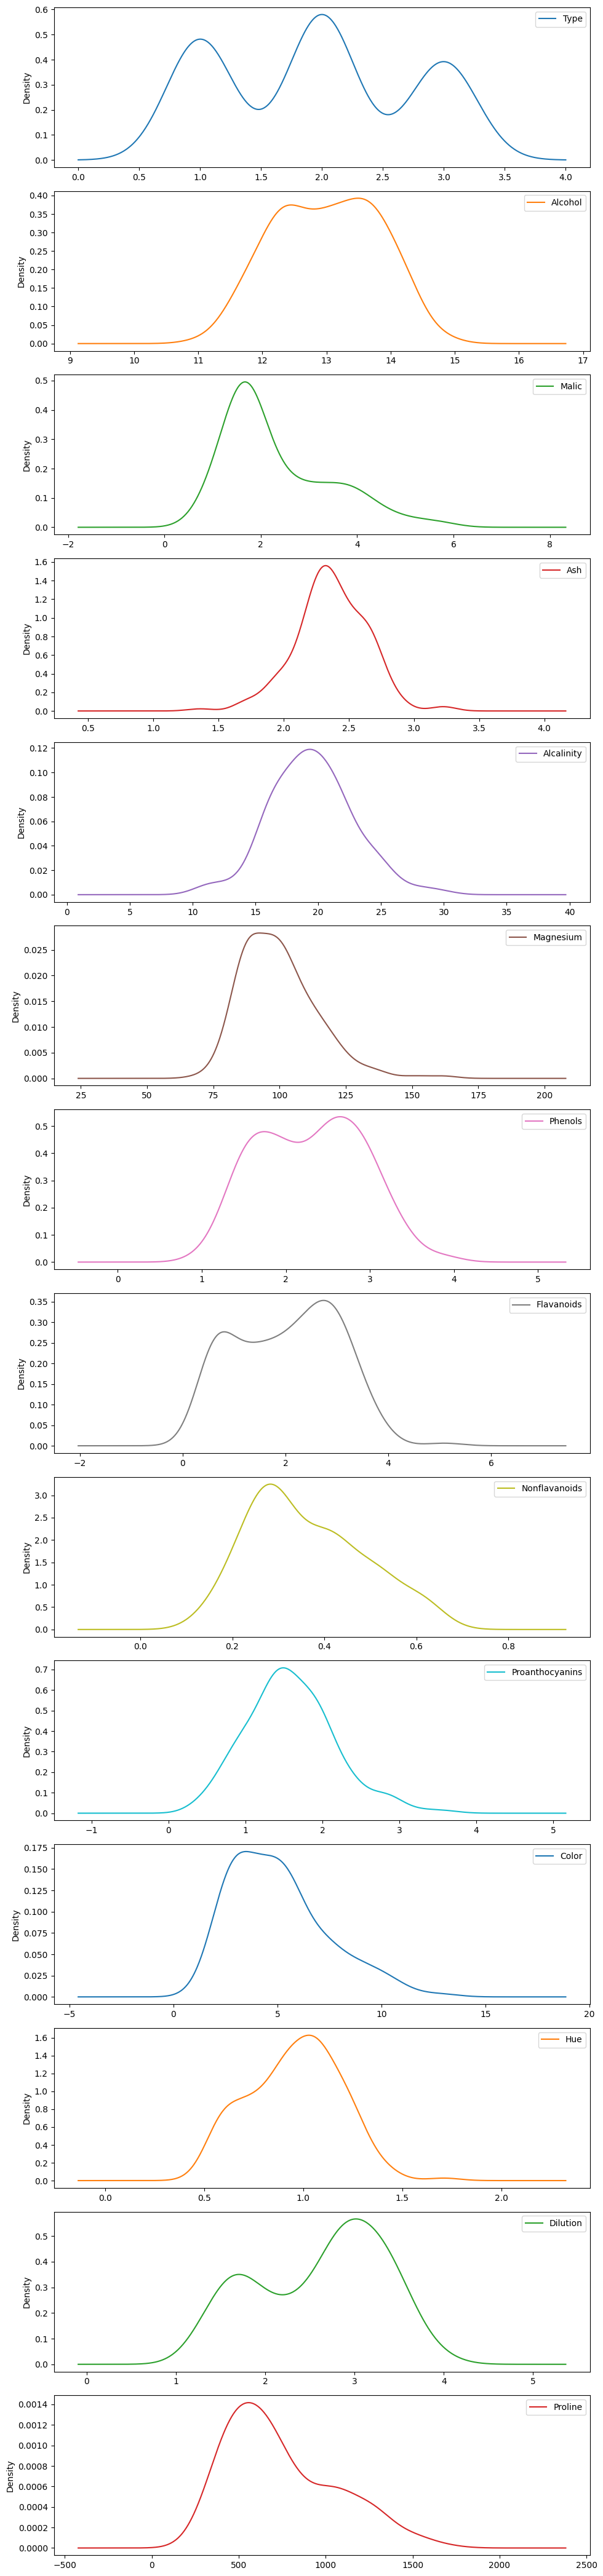

In [23]:
num_features = df.shape[1]
layout = (num_features, 1)  # One feature per row
df.plot(kind='density', subplots=True, layout=layout, sharex=False, figsize=(10, num_features*3))
plt.tight_layout()
plt.show()

In [24]:
corr_matrix = df.corr()
print(corr_matrix)

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

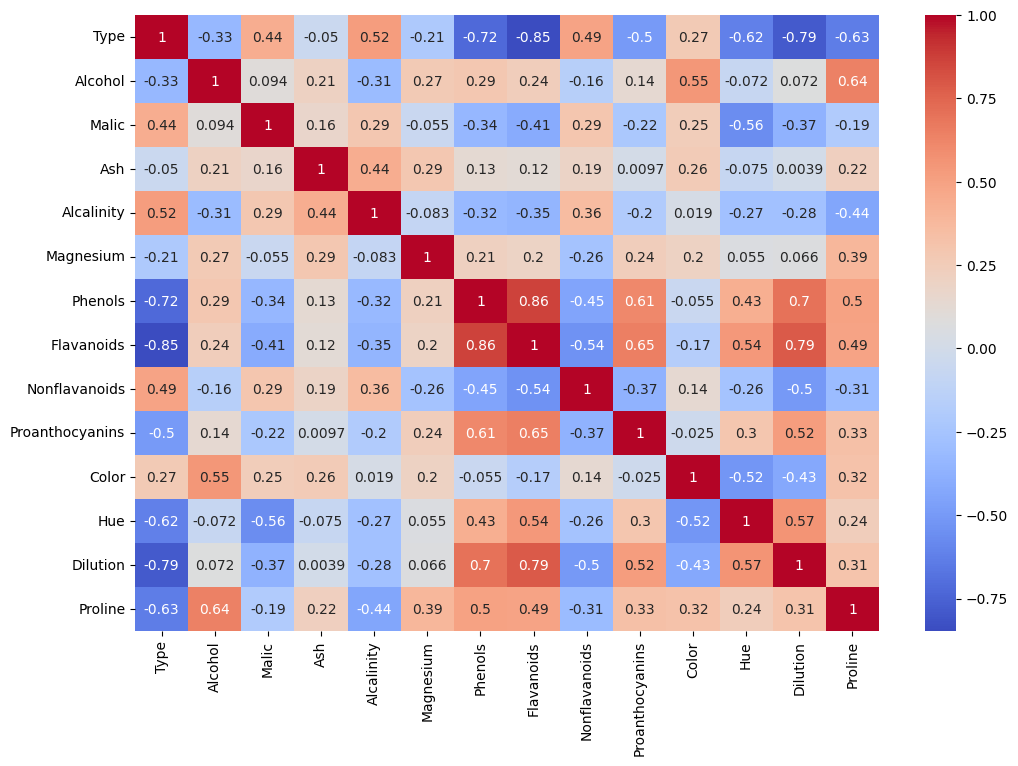

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [27]:
# Fit PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

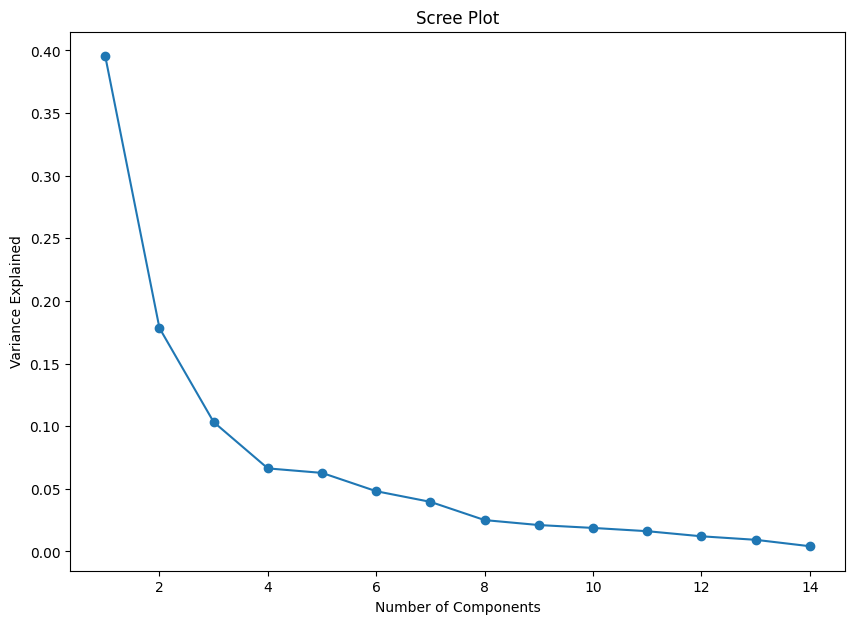

In [28]:
# Scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

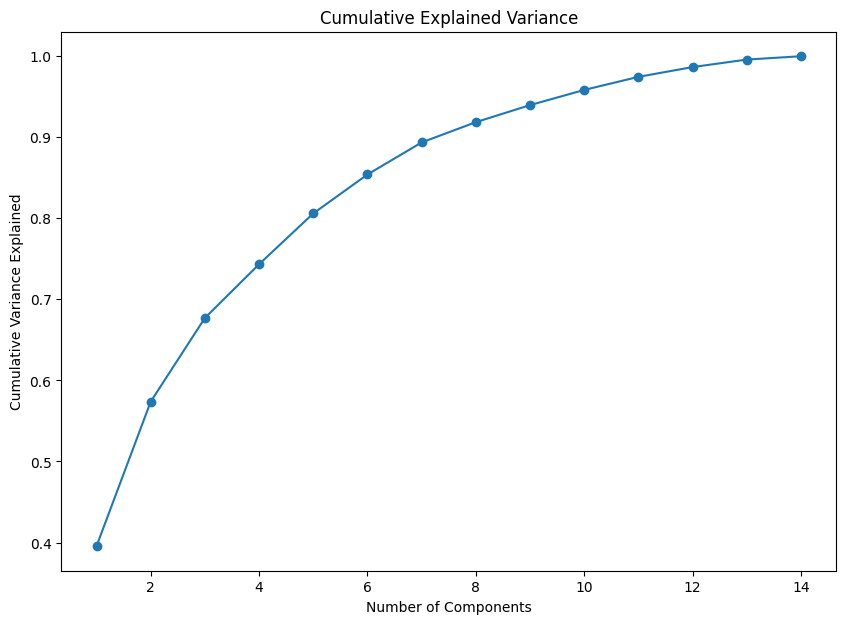

In [29]:
# Cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.show()

In [30]:
# Determine optimal number of components (e.g., components explaining at least 95% variance)
optimal_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 10


In [31]:
# Fit PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
pca_df = pca.fit_transform(scaled_df)

In [32]:
# Determine the number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

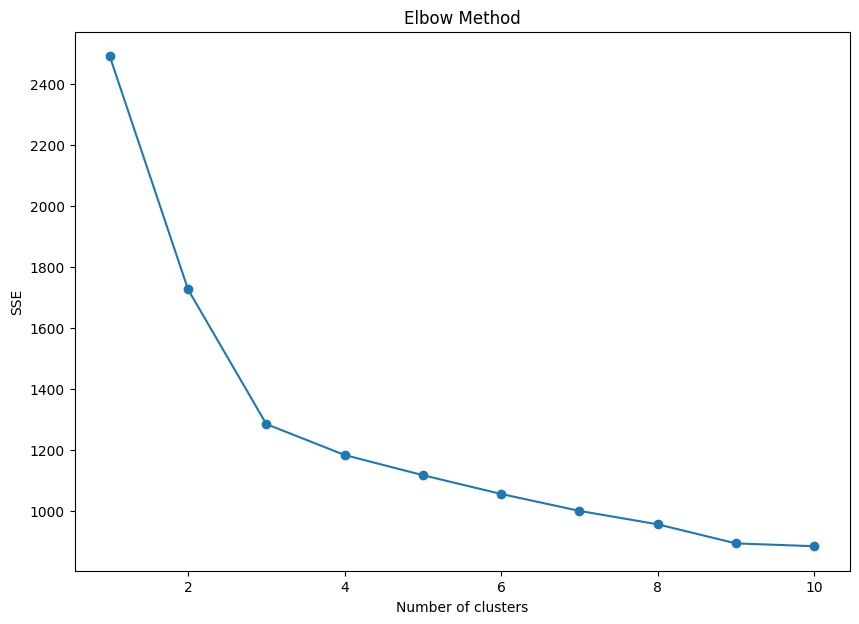

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [34]:
# Fit K-means with optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


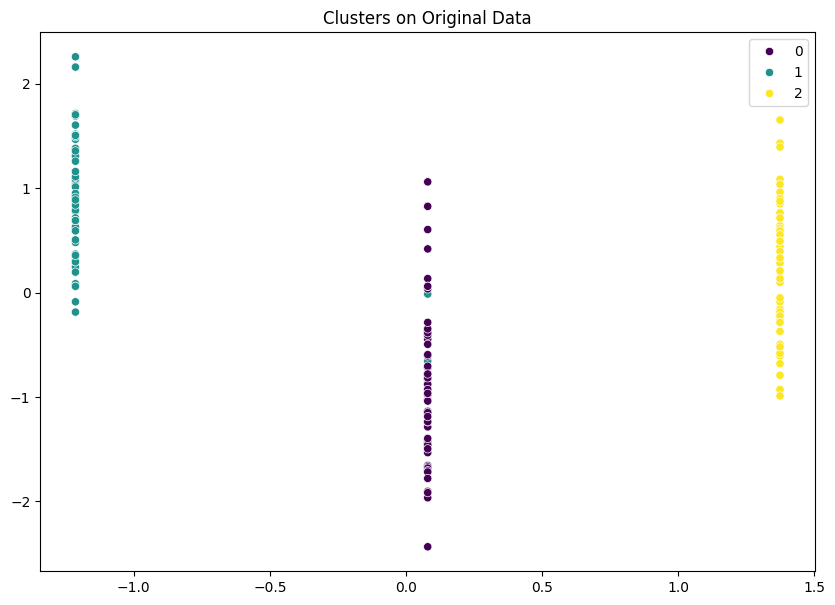

In [35]:
# Assuming 2D or 3D visualization is feasible
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters on Original Data')
plt.show()

In [36]:
# Silhouette score
sil_score = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.30773604383565206


In [37]:
# Davies-Bouldin index
db_index = davies_bouldin_score(scaled_df, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.3163957434114109


In [38]:
# Fit K-means with the same number of clusters on PCA-transformed data
pca_kmeans = KMeans(n_clusters=3, random_state=42)
pca_clusters = pca_kmeans.fit_predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


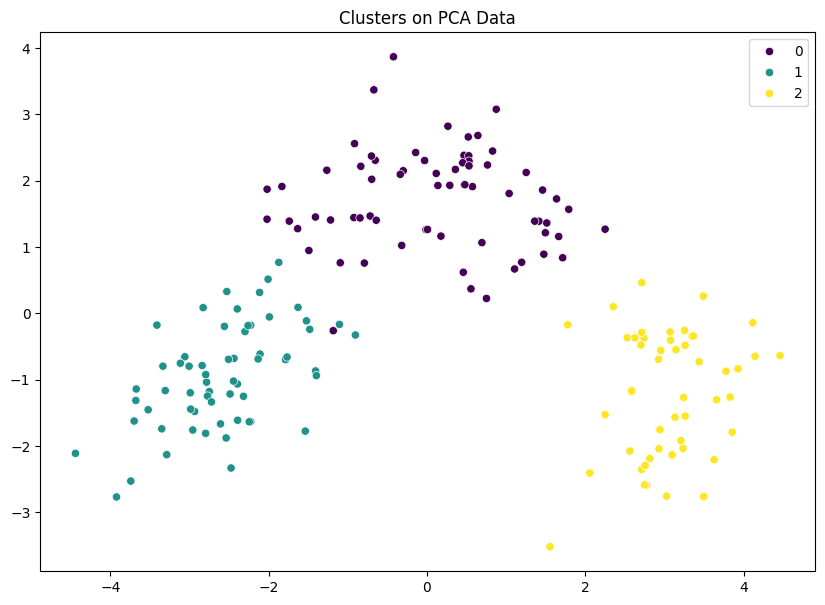

In [39]:
# Assuming 2D or 3D visualization is feasible
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clusters on PCA Data')
plt.show()

In [40]:

# Silhouette score on PCA Data
pca_sil_score = silhouette_score(pca_df, pca_clusters)
print(f'Silhouette Score on PCA Data: {pca_sil_score}')

Silhouette Score on PCA Data: 0.3240658205331189


In [41]:
# Davies-Bouldin index on PCA Data
pca_db_index = davies_bouldin_score(pca_df, pca_clusters)
print(f'Davies-Bouldin Index on PCA Data: {pca_db_index}')

Davies-Bouldin Index on PCA Data: 1.2584890242254965
